<a href="https://colab.research.google.com/github/gil612/NLP/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Preprocessing:
1. read with encoding
2. drop NAN columns
3. rename columns
4. draw labels' histogram
5. create binary labels using map function and to-numpy()

Modelling:
1. train_test_split on data
2. featurizer Countervectorizer / TfidfVectorizer
3. Create X-matrix
  a. apply featurizer fit transform on df_train
  b. apply featurizer transform on df_test
4. Create the model MultinomialNB
5. fit the model on `train data`
6. model.score
7. Predict F1 score with Ptrain, Ptest
8. Probability Predict with ROC AUC

Evaluating:
1. Confusion Matrix on `train data`
2. Plot Confusion Matrix
3. Plot Confusion Matrix on y_test, Ptest

In [2]:
# I build a model to detect spam

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# The csv containes some invalid characters
df = pd.read_csv("drive/My Drive/SpamDetector/spam.csv", encoding = 'ISO-8859-1')


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ['labels', 'data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

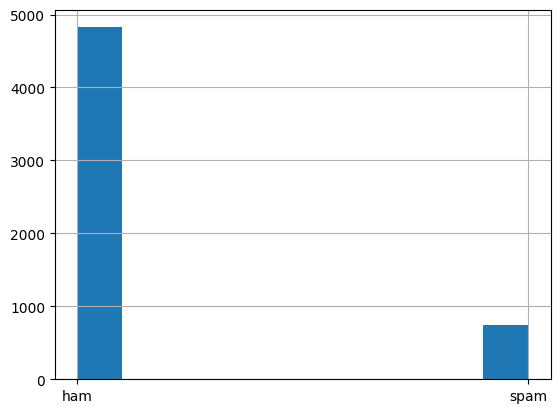

In [10]:
# ham is much more common than spam, so it will make sense to look at other metrics such as the F1 score in the AUC.
df['labels'].hist()

In [11]:
# create binary labels - we want the label to be represented numerically
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(
    df['data'], Y, test_size = 0.33
)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# X_train matrix contains the input features of every matrix

featurizer  = TfidfVectorizer(decode_error = 'ignore')

# featurizer = CountVectorizer(decode_error = 'ignore')


Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [14]:
Xtrain

<3733x6958 sparse matrix of type '<class 'numpy.float64'>'
	with 49301 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.naive_bayes import MultinomialNB
# create the model, train, print scores
model = MultinomialNB()
model.fit(Xtrain,y_train)
print("train acc: ", model.score(Xtrain, y_train))
print("test acc: ", model.score(Xtest, y_test))

train acc:  0.970265202250201
test acc:  0.9516041326808048


In [16]:
from sklearn.metrics import f1_score

# F1 is the harmonic mean of precsion and recall
# Over 90% = Good sign
# train F1:  0.9763313609467457
# train F1:  0.9763313609467457

Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1: ", f1_score(y_train,Ptrain))
print("train F1: ", f1_score(y_train,Ptrain))

train F1:  0.8719723183391004
train F1:  0.8719723183391004


In [17]:
from sklearn.metrics import roc_auc_score

prob_train = model.predict_proba(Xtrain)[:,1]
prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC :", roc_auc_score(y_train, prob_train))
print("test AUC :", roc_auc_score(y_test, prob_test))

train AUC : 0.9932472470806575
test AUC : 0.9842803838214456


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, Ptrain)
cm

array([[3244,    0],
       [ 111,  378]])

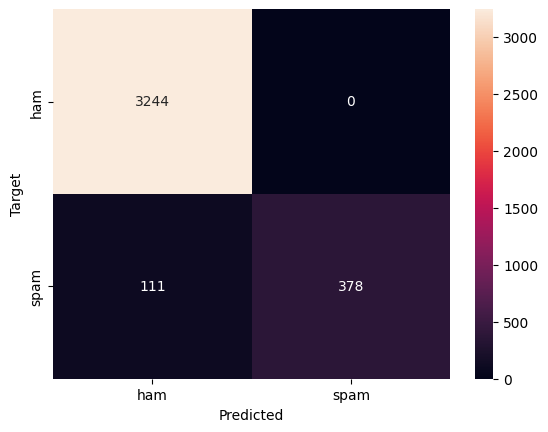

In [19]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted

def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot = True, fmt = 'g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
plot_cm(cm)

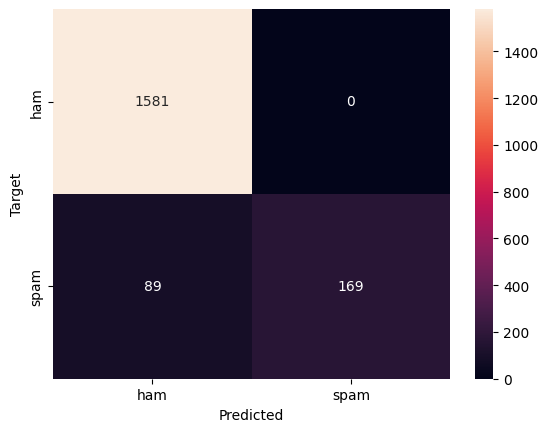

In [20]:
cm_test = confusion_matrix(y_test, Ptest)
plot_cm(cm_test)

In [34]:
from wordcloud import WordCloud
# Visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width = 600, height = 400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

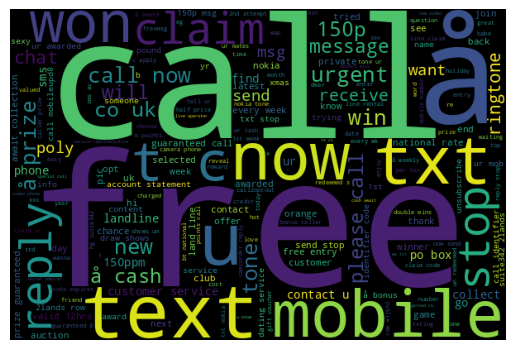

In [35]:
visualize('spam')

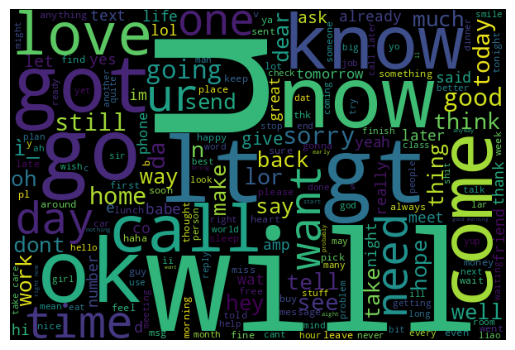

In [36]:
visualize('ham')

In [24]:
df[df['b_labels'] == 1]['data']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: data, Length: 747, dtype: object

In [25]:
# see what we're getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [26]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
Will u meet ur drea

In [37]:
# Things that should not be spam
sneaky_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in sneaky_spam:
  print(msg)